# 1.1 Python Essentials

## 1.1.1 List Comprehension

In [92]:
# new_list = [expression for item in iterable if condition], filtered with condition
# Condition as filtering, after for loop
lst = [x for x in range(5) if x % 2 == 0]
print(lst)

[0, 2, 4]


In [93]:
# Expression as simple function.
numbers = [1,2,3,4,5,6]
squared = [x**2 for x in numbers if x % 2 != 0]
print(squared)

[1, 9, 25]


In [94]:
# Nesting. 1st for = outer loop, 2st = inner loop.
matrix = [[1,2,3],[4,5,6],[7,8,9]]
# naming of the item in iterable is arbiturary.
flattened = [num for row in matrix for num in row]
print(flattened)

print([m+"_"+n for m in ["a","b"] for n in ["c", "d"]])

[1, 2, 3, 4, 5, 6, 7, 8, 9]
['a_c', 'a_d', 'b_c', 'b_d']


In [95]:
# Conditional control 
# Condition as flow control, before for loop
numbers = [1,2,3,4,5,6]
result_1 = ['even' if i % 2 == 0 else 'odd' for i in numbers]
print(result_1)
result_2 = [i if i <= 4 else 4 for i in numbers]
print(result_2)

['odd', 'even', 'odd', 'even', 'odd', 'even']
[1, 2, 3, 4, 4, 4]


In [96]:
# Create a list of tuples
names = ['Alice', 'Bob', 'Charlie']
name_length = [(name, len(name)) for name in names]
print(name_length)

[('Alice', 5), ('Bob', 3), ('Charlie', 7)]


## 1.1.2 Lambda Function and its applications

Q: Why use lambda function?    
A: When function to use is **simple** and for **short-term oeprations** where a **full function definition is unnecessary**. Only care about the **mapping**.

- map()
- filter()
- key argument in sorting functions like sorted()
- reduce()

In [97]:
# Example structure: labmda arguments: expressions
# Not a good example here. Typically it does not have a name.
square = lambda x: x**2
print(square(2))

4


In [98]:
# Lambda function in list comprehension
lst = [(lambda x: x**2) (i) for i in range(5)]
print(lst)

[0, 1, 4, 9, 16]


In [99]:
# map() to simplify lambda function in list comprehension
# map(func, *iterables) --> map object
my_map = map((lambda x: x**2), range(5))
# Use list() to get the list from the map object
# It may accur typer error: 'list' object is not callable, because previouse I defined a list with name list. 
my_list = list(my_map)
print(my_list)

[0, 1, 4, 9, 16]


In [100]:
# Multiple parameters in lambda function => multiple iterables
my_list = list(map(lambda x,y: str(x)+'_'+y, range(5), list('abcde')))
print(my_list)

['0_a', '1_b', '2_c', '3_d', '4_e']


In [101]:
# filter() to selectively include elements in a new iterable based on a condition.
# filter(function or None, iterable) --> filter object
# Return when function is true
numbers = [1,2,3,4,5,6]
evens = list(filter(lambda x: x % 2 == 0, numbers))
print(evens)

[2, 4, 6]


In [102]:
# Often used as the key arguments in sorting functions
names = ['Alice', 'Bob', 'Charlie', 'David']
sorted_names = sorted(names, key=lambda x: len(x))
print(sorted_names)

['Bob', 'Alice', 'David', 'Charlie']


In [103]:
# Another common use is to provide functions for reduce()
# reduce() -> Apply a rolling computation to a sequention pairs of values in a list.
# For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates ((((1+2)+3)+4)+5)
from functools import reduce
product = reduce(lambda x, y: x * y, [1, 2, 3, 4]) # calculates ((1*2)*3)*4
print(product)

24


## 1.1.3 Zip and Enumerate

`zip()`: 

- Combine two or more iterables, **element by element**, and returns **an iterator of tuples**.
- Use `list()` or `tuple()` to get items.
- Use when need to iterate over multiple iterables simutaneously and process elements together.
- `*` to unpack.
- Useful in **creating a dictionary**.

In [104]:
# Structure: zip(iterable1, iterable2, ...)
# Example
names = ['Alice', 'Bob', 'Charlie', 'Jack']
ages = [25, 30, 35]

combined = list(zip(names, ages)) # if use tuple(), combined will be a tuple with the same members.
print(combined)
# Stop creating tuples when the shortest iterable is exhausted.

# Iterate through a zipped iterable:
for name, age in zip(names, ages):
    print(f"Name: {name}, ", f"Age: {age}")

[('Alice', 25), ('Bob', 30), ('Charlie', 35)]
Name: Alice,  Age: 25
Name: Bob,  Age: 30
Name: Charlie,  Age: 35


In [105]:
# Use zip() to unzip a zipped iterable (e.g. a list of tuples) by applying the `*` unpacking operator
names_1, ages_1 = zip(*combined)
print(names_1)
print(ages_1)

('Alice', 'Bob', 'Charlie')
(25, 30, 35)


In [106]:
# zip() is very useful in creating a dictionary from two list.
print(dict(zip(names, ages)))

{'Alice': 25, 'Bob': 30, 'Charlie': 35}


`enumerate()`:

- Iterate over a sequence while **keeping track of the index** of the current item.
- Returns a **tuple** containing **index** and corresponding **element**.
- Useful when need to **work with index**.

In [107]:
# Structure: enumerate(iterable, start=0) start is defatulted.
# Example:
for index, name in enumerate(names):
    print(f"Index: {index}, Name: {name}")

Index: 0, Name: Alice
Index: 1, Name: Bob
Index: 2, Name: Charlie
Index: 3, Name: Jack


In [108]:
# Start index can be changed:
for index, name in enumerate(names, start=1):
    print(f"Index: {index}, Name: {name}")

Index: 1, Name: Alice
Index: 2, Name: Bob
Index: 3, Name: Charlie
Index: 4, Name: Jack


# 1.2 NumPy Essentials

Check other resources to understand NumPy Basics: 
- https://www.runoob.com/numpy/numpy-ndarray-object.html
- https://numpy.org/doc/1.26/user/index.html

NumPy Arrays (**ndarray**):

- Multi-dimensional, homogeneous (**same data type**) array of **fixed-size?->can be resized, not append** elements => a **Matrix**.
- Fundamental data structure in NumPy.
- Much more efficient than Python list.

## 1.2.1 Constructing NumPy Arrays

Notice this is not an exhaustive list. Different tutorials will have different selections. Just search for customized needs.

In [109]:
import numpy as np

### 1.2.1.1 General and special ndarrays

In [110]:
# Construct with array()
my_array = np.array([1,2,3]) # Convert from list
print(type(my_array))
print(my_array)

# 2-dimemtional looks like:
# Still taking a list as input, but have to be a 2-d list.
my_array = np.array([[1,2,3],[4,5,6]])
print(my_array)

<class 'numpy.ndarray'>
[1 2 3]
[[1 2 3]
 [4 5 6]]


In [111]:
# Arithmetic sequences
# np.linspace(start, stop(inclusive), # of samples)
seq = np.linspace(1,9,5)
print(seq)

# np.arrange(start, stop(non-inclusive), step)
seq = np.arange(1,9,2)
print(seq)

[1. 3. 5. 7. 9.]
[1 3 5 7]


In [112]:
# A matrix of zeros, or ones with np.ones
my_array = np.zeros((2,3)) # tuple as the size of matrix -> row, col
print(my_array)

# Default datatype is float, and be reset:
my_array = np.zeros((2,3), dtype=int)
print(my_array)

[[0. 0. 0.]
 [0. 0. 0.]]
[[0 0 0]
 [0 0 0]]


In [113]:
# Unit matrix
print(np.eye(3)) # 3 x 3 unit matrix, can be offet be setting parameter k

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [114]:
# Full matrix
print(np.full((2,3),10)) # tuple -> size, 10 -> item to fill

# Filling every row with an input list
print(np.full((2,3),[1,2,3]))

[[10 10 10]
 [10 10 10]]
[[1 2 3]
 [1 2 3]]


### 1.2.1.2 Random ndarrays 

In [115]:
# 0-1 random numbers, uniform distribution
# The input could be a tuple -> 2-d matrix
my_rand = np.random.rand(5)
print(my_rand)

# For a customized range:
a, b = 5, 15
my_rand = (b - a) * np.random.rand(5) + a
print(my_rand)

# However, it is better to use the built-in:
my_rand = np.random.uniform(5,15,5)
print(my_rand)

[0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
[ 5.20584494 14.69909852 13.32442641  7.12339111  6.81824967]
[ 6.8340451   8.04242243 10.24756432  9.31945019  7.9122914 ]


In [116]:
# N(0,1) random numbers, normal distribution
my_rand = np.random.randn(5)
print(my_rand)

# For a customized sigma, mu
mu, sigma = 4, 2
my_rand = mu + np.random.randn(5) * sigma
print(my_rand)

# However, it is better to use the built-in:
my_rand = np.random.normal(4,2,5)
print(my_rand)

[-1.01283112  0.31424733 -0.90802408 -1.4123037   1.46564877]
[3.5484474  4.13505641 1.15050363 2.91123455 4.22184518]
[1.69801285 4.75139604 2.79872262 3.4166125  2.79658678]


In [117]:
# Random integers in customized range
low, high, size = 1,100,10
my_rand = np.random.randint(low, high, size)
print(my_rand)

[71 44  8 47 35 78 81 36 50  4]


In [118]:
# Customized sampling from a list.
# Default = uniform and sampling with replacement.
# Can specify sampling method and probability for each element.
my_list = [1,2,3,4,5]
my_rand = np.random.choice(my_list, 3, replace=False, p=[0.1,0.1,0.6,0.1,0.1])
print(my_rand)

[3 1 5]


In [119]:
# Random seed. Use to fix output. Often use 42 in ML.
my_rand = np.random.rand(5)
print(my_rand)
my_rand = np.random.rand(5)
print(my_rand)

# Set seed before calling. Seed released after calling.
np.random.seed(42)
my_rand = np.random.rand(5)
print(my_rand)
np.random.seed(42)
my_rand = np.random.rand(5)
print(my_rand)

[0.77513282 0.93949894 0.89482735 0.59789998 0.92187424]
[0.0884925  0.19598286 0.04522729 0.32533033 0.38867729]
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


## 1.2.2 Transformation and concatenation

In [120]:
# Transpose, row <=> col
my_array = np.zeros((2,3))
print(my_array)
my_array = my_array.T # Create a copy, not mutating. So need a var to receive the copy.
print(my_array)

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [121]:
# Concatenate, np.r_ and np.c_ on different axis

# r_ -> by row
my_array = np.zeros((2,3))
print(my_array)
my_con = np.r_[my_array, my_array] # use []
print(my_con)

# c_ -> by col
my_con = np.c_[my_array, my_array] # use []
print(my_con)

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [122]:
# Concatenate a 1-d to a 2-d
# The only way to do this is to think of the 1-d array as a col vector!
# The col vector must match the col size (# of rows) in the 2-d array.
# Only use np.c_
my_array_1 = np.ones(2)
print(my_array_1)

my_array_2 = np.zeros((2,3))
print(my_array_2)

# Use np_c to append 1-d.
# Position of param identifies where to append.
print(np.c_[my_array_1, my_array_2])
print(np.c_[my_array_2, my_array_1])

[1. 1.]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [123]:
# Reshape: 1-d to n-d or n-d to 1-d
# Reshape from c and f direction? Default = c
my_array = np.arange(8)
print(my_array)

print(my_array.reshape(2,4))

print(my_array.reshape(4,2))

print(my_array.reshape(4,2, order='F'))

# It is common to turn n*1 (col) to rows
my_array = np.ones((3,1))
print(my_array)
print(my_array.reshape(-1)) # Just remember it is a easy way to flatten...

[0 1 2 3 4 5 6 7]
[[0 1 2 3]
 [4 5 6 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
[[1.]
 [1.]
 [1.]]
[1. 1. 1.]


## 1.2.3 Slicing and Indexing

In [124]:
# Support [start:end:step]
my_array = np.arange(9).reshape(3,3)
print(my_array)

# Treat the 2-d array as an array of rows.
print(my_array[:2])
# Can specify col to be sliced by passing a list:
print(my_array[::,[2]]) # :: meaning to include all rows, [2] means to slice the col indexed 2.

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]]
[[2]
 [5]
 [8]]


In [125]:
# Boolean indexing with np.ix_.
# ndarray[np.ix_([],[])]
# The first list is a mask for rows, first element -> first row and so forth.
# The second list is a mask for cols, first element -> first col and so forth.
print(my_array)
print(my_array[np.ix_([True])])
print(my_array[np.ix_([True],[True])])
print(my_array[np.ix_([True,True])])
print(my_array[np.ix_([True,True],[True,True])])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]]
[[0]]
[[0 1 2]
 [3 4 5]]
[[0 1]
 [3 4]]


In [126]:
# for 1-d array, simply put condition in [], no need to use np.ix_
print(my_array)
new = my_array.reshape(-1)
print(new)
print(new[new % 2 == 0])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]
[0 2 4 6 8]


## 1.2.4 Common NumPy Functions

In [137]:
# np.where(condition, val if true, val if false)
# where is called from np not an ndarray instance.
my_array = np.array([1,2,3,4,5])
print(my_array)

print(np.where(my_array%2==0, 0, 10))

[1 2 3 4 5]
[10  0 10  0 10]


In [144]:
# nonzero
# Return the index of non-zeros.
my_array = np.array([0,2,4,6,8,10])
print(my_array.nonzero())
print(np.nonzero(my_array))

# argmax
# Return the index of max
print(my_array.argmax())
print(np.argmax(my_array))

# argmin
print(my_array.argmin())
print(np.argmin(my_array))

(array([1, 2, 3, 4, 5], dtype=int64),)
(array([1, 2, 3, 4, 5], dtype=int64),)
5
5
0
0


In [150]:
# any
# True if has at least 1 non-zero
my_array = np.zeros(5)
print(my_array.any())
my_array[4] = 1
print(my_array)
print(my_array.any())

# all
# True if all non-zero
print(my_array.all())
my_array = np.ones(5)
print(my_array.all())

False
[0. 0. 0. 0. 1.]
True
False
True


In [158]:
# cumprod
# Accumulation of products. Return same size of array.
my_array = np.array([1,2,3,4,5])
print(my_array.cumprod())

# cumsum
# Accumulation of sum. Return same size of array.
print(my_array.cumsum())

# np.diff()
# Calculate the differece between adjacent elements.
my_array[4] = 6
print(np.diff(my_array))

[  1   2   6  24 120]
[ 1  3  6 10 15]
[1 1 1 2]


In [167]:
# Descriptive statistics
# max, min, mean, median, std, var, sum, quantile
# quantile is global method, called from np.quantile()
my_array = np.array([1,2,3,4,5])
print(f"Max: {my_array.max()}")
print(f"0.5 quantile: {np.quantile(my_array, 0.5)}")

# However, for arrays with missing values, these functions wilj just return nan.
# As a result, have to use np.nan functions to skip nan.
# my_array[4] = np.nan -> This is not working. Cannot convert int to NaN
my_array = np.array([1,2,3,4,np.nan])
print(my_array)
print(f"Max: {my_array.max()}")
print(f"Max: {np.nanmax(my_array)}")

Max: 5
0.5 quantile: 3.0
[ 1.  2.  3.  4. nan]
Max: nan
Max: 4.0


In [189]:
# Covariance and Coefficient Correlation
# Must understand the concept and how they calculated!
# Corr (pearson) = Cov/(sig X * sig Y)
# Corr = 1 -> perfect positive linear; -1 -> perfect negative linear; 0 -> no linear relationship
# Use np.cov and np.corrcoef
my_array_1 = np.array([1,2,3,4,5])
my_array_2 = np.array([6,7,8,9,10])
print(np.cov(my_array_1, my_array_2))
print(np.corrcoef(my_array_1, my_array_2))

[[2.5 2.5]
 [2.5 2.5]]
[[1. 1.]
 [1. 1.]]


[[1.         0.98815829]
 [0.98815829 1.        ]]
0.9881582860812733


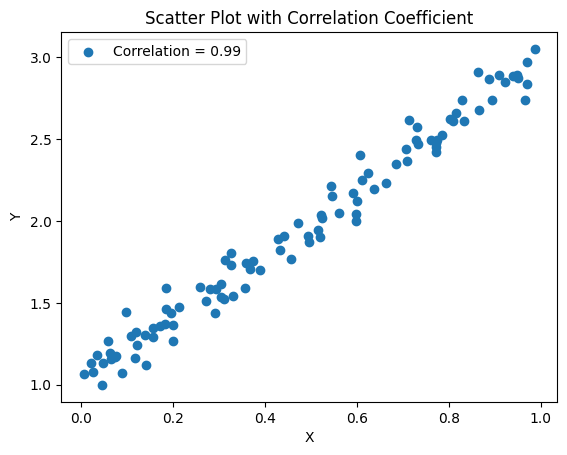

In [191]:
# ChatGPT Example on Corr!!

# Generate two arrays with a known correlation
np.random.seed(42)
x = np.random.rand(100)
y = 2 * x + 1 + 0.1 * np.random.randn(100)  # Linear relationship with some noise

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1] # This is very important! A way to convert corr matrix to a val.
print(np.corrcoef(x, y))
print(correlation_coefficient)

# Plot the scatter plot
plt.scatter(x, y, label=f'Correlation = {correlation_coefficient:.2f}')
plt.title('Scatter Plot with Correlation Coefficient')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [199]:
# axis param for stats functions
# axis = 0 -> by col, axis = 1 -> by row
my_array = np.arange(1,10).reshape(3,-1)
print(my_array)
print(f'default sum: {my_array.sum()}') # sum all
# by col
print(f'by col sum on 0 axis: {my_array.sum(0)}')
# by row
print(f'by row sum on 1 axis: {my_array.sum(1)}')

[[1 2 3]
 [4 5 6]
 [7 8 9]]
default sum: 45
by col sum on 0 axis: [12 15 18]
by row sum on 1 axis: [ 6 15 24]


## 1.2.5 Broadcasting

- Allow operations to be performed on arrays of different shapes and sizes.
- Enable universal functions to work with arrays of different shapes and sizes.

Rules:

- Dimensions of the arrays should be compatible
- If dimensions are different, pad the smaller shape with ones on its left.
- Size along a dimension must either be equal or one of them must be 1.

In [203]:
# Broadcasting with scalar
# Scalar is broadcasted to the shape of the array.
arr_1 = np.array([1,2,3,4,5,6])
print(arr_1 + 10)
arr_2 = arr_1.reshape(2,3)
print(arr_2 + 10)
print(arr_2 * 10)

[11 12 13 14 15 16]
[[11 12 13]
 [14 15 16]]
[[10 20 30]
 [40 50 60]]


In [225]:
# Broadcasting with 1-d and 2-d arrays
# Dimension need to be match.
arr_1 = np.array([1,2,3,4,5,6])
arr_2 = np.ones(6) * 10
print(arr_1 + arr_2)

# To operate 1-d array and 2-d array, the 1-d array must match the size of ROW or COL.
arr_1 = arr_1.reshape(2,3)
print(arr_1)
# The 1-d array should match the ROW size of the 2-d array.
# The operation will be appied by ROW.
print(arr_1 * np.array([10,100,1000]))
# OR reshape the 1-d array to make it a COL. For example, a 2 x 1 array.
# The operation will be applied by COL.
print(arr_1 * np.array([[10],[100]]))

[11. 12. 13. 14. 15. 16.]
[[1 2 3]
 [4 5 6]]
[[  10  200 3000]
 [  40  500 6000]]
[[ 10  20  30]
 [400 500 600]]


## 1.2.6 Vector and Matrix Calculation

In [230]:
# Vector dot product.
# Sum(a1b1 + a2b2 + ... + anbn)
# Must be same size.
arr_1 = np.array([1,2,3])
arr_2 = np.array([10,20,30])
print(arr_1.dot(arr_2))

140


In [231]:
# Vector norm and Matrix norm
# np.linalg.norm
# Check back later

In [233]:
# Matrix multiplacation.
# Check back later

# 1.3 Exercises

In [235]:
# Check back later